# **Creating Images of Cracks on Walls Using DDPM**

This notebook is designed for your dataset, allowing you to generate images depicting cracks on walls with 70% accuracy. Please execute each cell as instructed.

If you wish to adjust parameters, you can do so by opening and editing the "default.yaml" file inside the "config" folder.

<details>
  <summary>Read more</summary>
  <p>
       Explanation of Parameters:

dataset_params:

*   im_path: Path to the folder containing training images of walls with cracks.

diffusion_params:

*   num_timesteps: Number of diffusion timesteps, controlling the evolution of the image.
*   beta_start: Starting value of beta, a diffusion parameter.List item
*   beta_end: Ending value of beta, a diffusion parameter.

model_params:
*   im_channels: Number of channels in the input images (usually 3 for RGB).
*   im_size: Size of input images (e.g., 64x64 pixels).
*   down_channels: Number of channels in the downsampling layers.
*   mid_channels: Number of channels in the middle layers.
*   down_sample: Indicates whether downsampling is applied at each layer.
*   time_emb_dim: Dimensionality of the time embedding.
*   num_down_layers: Number of downsampling layers.
*   num_mid_layers: Number of middle layers.
*   num_up_layers: Number of upsampling layers.
*   num_heads: Number of attention heads in the model.

train_params:
*   task_name: Name of the training task.
*   batch_size: Number of samples processed in each training iteration.
*   num_epochs: Number of training epochs.
*   num_samples: Number of samples generated during training.
*   num_grid_rows: Number of rows in the grid of generated images for visualization.
*   lr: Learning rate for training.
*   ckpt_name: Name of the checkpoint file where model weights are saved.
  </p>
</details>











# **Clone the required Github Repository**

In [1]:
!git clone https://github.com/mognc/DDPM-model.git

Cloning into 'DDPM-model'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 66 (delta 31), reused 36 (delta 11), pack-reused 0
Receiving objects: 100% (66/66), 21.74 KiB | 10.87 MiB/s, done.
Resolving deltas: 100% (31/31), done.


In [2]:
%cd /content/DDPM-model

/content/DDPM-model


# **Create the training directory**
Please execute this cell only if you plan to upload your dataset and train a new model file.

In [5]:
import os

# Define the path to the main directory
main_directory = '/content/DDPM-model'

# Create the 'data' folder inside the main directory
data_folder = os.path.join(main_directory, 'data')
os.makedirs(data_folder, exist_ok=True)

# Create the 'train' folder inside the 'data' folder
train_folder = os.path.join(data_folder, 'train')
os.makedirs(train_folder, exist_ok=True)

# Create the 'images' folder inside the 'train' folder
images_folder = os.path.join(train_folder, 'images')
os.makedirs(images_folder, exist_ok=True)

print("Directory structure created successfully.")

Directory structure created successfully.


# **Mount your Google drive and upload your images**

Note:
You don't need to execute this cell if you intend to upload your dataset or pre-trained model file locally from your PC

In [ ]:
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Choose how you would like to upload your images**


*   Cell 1: Through Google Drive (Faster method)
*   Cell 2: Through a zip file in your PC (Slower Method)

Prerequisites:
*   For Cell 1 make sure you have uploaded your dataset to your drive
*   For Cell 2 make sure you have a zipped file of your dataset on your PC


In [ ]:
# @title Cell 1

import shutil

# Define the path to the temporary directory in Google Colab
temp_directory = '/content/temp'

# Create the temporary directory if it doesn't exist
os.makedirs(temp_directory, exist_ok=True)

# Move images from Google Drive to the temporary directory
drive_images_folder = '/content/drive/MyDrive/rgb'           #Change the path here according to your own drive
for file_name in os.listdir(drive_images_folder):
    source_file_path = os.path.join(drive_images_folder, file_name)
    if os.path.isfile(source_file_path):
        shutil.copy(source_file_path, temp_directory)

# Move images from the temporary directory to the 'images' folder
for file_name in os.listdir(temp_directory):
    source_file_path = os.path.join(temp_directory, file_name)
    target_file_path = os.path.join(images_folder, file_name)
    shutil.move(source_file_path, target_file_path)

# Clean up the temporary directory
shutil.rmtree(temp_directory)

print("Images uploaded and moved successfully.")

In [ ]:
# @title Cell 2

from google.colab import files
import os
import zipfile

# Upload the zip file containing images
uploaded = files.upload()

# Extract the uploaded zip file
total_images_extracted = 0
for filename in uploaded.keys():
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall()
        total_images_extracted += len([name for name in zip_ref.namelist() if os.path.splitext(name)[1] in ['.jpg', '.jpeg', '.png']])

# Define the directory where you want to move the images
destination_path = '/content/DDPM-model/data/train/images'

# Create the destination directory if it doesn't exist
if not os.path.exists(destination_path):
    os.makedirs(destination_path)

# Move the images to the destination directory
for root, dirs, files in os.walk('/content'):
    for file in files:
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
            os.rename(os.path.join(root, file), os.path.join(destination_path, file))

print(f"Images have been moved to: {destination_path}")
print(f"Total number of images found in the zip file: {total_images_extracted}")


# **Display a sample of your dataset**

In [ ]:
import os
import random
import math
from PIL import Image
import matplotlib.pyplot as plt
# @title Use the slider to select how many to display
num_images_to_display = 14  # @param {type:"slider", min:0, max:100, step:1}

# Define the directory containing the images
directory = '/content/DDPM-model/data/train/images'

# Get a list of all image files in the directory
image_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.jpg') or f.endswith('.jpeg') or f.endswith('.png')]

# Determine the total number of images in the folder
total_images = len(image_files)

# Check if the number of images to display exceeds the total number of images available
if num_images_to_display > total_images:
    raise ValueError("Number of images to display exceeds the total number of images available.")

# Randomly select a subset of images
selected_images = random.sample(image_files, min(num_images_to_display, total_images))

# Calculate the number of rows and columns for the grid
num_cols = 3
num_rows = math.ceil(len(selected_images) / num_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes array
axes = axes.flatten()

# Loop through selected images and display them
for i, img_path in enumerate(selected_images):
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')

# Hide empty subplots
for j in range(len(selected_images), num_cols * num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# **Begin Training**
Run this if you want to train a fresh copy on a different dataset.

The default paramters are:

1.   Batch size : 6 (Training not posible above 100 if using Colab free and T4 GPU)
2.   Number of epochs: 200
3.   Folder where trained model file and samples are saved save to: trained_model

To learn how Batch size and no. of epoch effect your trained model file:
<details>
  <summary>Read more</summary>
  <p>
*   Batch Size: Dictates the number of training samples processed in one iteration, impacting memory usage and training speed; larger batches often accelerate training but might hinder model generalization.
*   Epoch: Represents one complete pass through the entire training dataset; more epochs can enhance model learning but may lead to overfitting, while fewer epochs might result in underfitting. Finding the right balance is crucial for optimal model performance.
  </p>
</details>

In [ ]:
from google.colab import files
import yaml

# @title Change training parameters or run with defaults

# Parameters to be set using the @params widget
Batch_size = 0  # @param {type:"slider", min:0, max:100, step:1}
Num_epochs = 200 # @param {type:"slider", min:0, max:500, step:1}
Folder = "trained_model" # @param {type:"string"}

# Load the existing YAML file
existing_file_path = '/content/DDPM-model/config/default.yaml'
with open(existing_file_path, 'r') as file:
    config = yaml.safe_load(file)

# Define the training parameters to be changed
new_training_params = {
    'batch_size': Batch_size,
    'num_epochs': Num_epochs,
    'task_name': Folder
    # Add more parameters here if needed
}

# Update the training parameters in the config
config['train_params'].update(new_training_params)

# Save the modified train_params back to the config
with open(existing_file_path, 'w') as file:
    yaml.dump(config, file, default_flow_style=False)

print("Training parameters updated successfully.")

!python -m tools.train_ddpm


# **Choose how you would like to upload the pre-trained model file**


*   Cell 1: Through Google Drive (Faster method)
*   Cell 2: Through your PC (Slower Method)

**Note**: By default the pre-trained model file will be saved to the 'trained_model' folder with samples also being generated there by default

Prerequisites:
*   For Cell 1 make sure you have uploaded your dataset to your drive
*   For Cell 2 make sure you have downladed the pre-trained model file (ddpm_ckpt.pth) on your PC



In [ ]:
# @title Cell 1

import os
import shutil

def create_default_folder_with_file(file_path):
    # Create a folder named 'trained_model'
    os.makedirs('trained_model', exist_ok=True)

    # Extract the filename from the provided path
    file_name = os.path.basename(file_path)

    # Copy the file to the 'trained_model' folder
    shutil.copy(file_path, os.path.join('trained_model', file_name))

    print(f"File '{file_name}' placed in the folder.")

if __name__ == "__main__":
    # Hardcoded file path
    file_path = "/content/drive/MyDrive/ddpm_ckpt.pth"  # Replace this with the actual file path from your drive
    create_default_folder_with_file(file_path)

In [ ]:
# @title Cell 2
from google.colab import files
import shutil

# Upload a file from your PC
print("Upload your file:")
uploaded = files.upload()

# Get the uploaded file name
uploaded_file_name = list(uploaded.keys())[0]

# Define the destination directory
destination_directory = '/content/DDPM-model/trained_model/'

# Move the uploaded file to the destination directory
shutil.move(uploaded_file_name, destination_directory)

# Print a custom message
print("File moved successfully to:", destination_directory)



# **Generate sample images**

This cell will generate samples inside the "trained_model" folder. The "samples" folder should contain a total of 1000 images once generation is complete, with one image for each timestep. Your final output will be labeled as "x0_0".

The default parameters are:

*   Size of samples: 64 (Generation not posible above 100 if using Colab free and T4 GPU)
*   Number of samples: 3



In [3]:
from google.colab import files
import yaml

# @title Use the slider to adjust generation parameters or run with defaults

# Parameters to be set using the @params widget
im_size = 100 # @param {type:"slider", min:0, max:1000, step:1}
num_samples = 3 # @param {type:"slider", min:0, max:100, step:1}

# Load the existing YAML file
existing_file_path = '/content/DDPM-model/config/default.yaml'
with open(existing_file_path, 'r') as file:
    config = yaml.safe_load(file)

# Define the dataset parameters to be changed
new_model_params = {
    'im_size': im_size,
    # Add more parameters here if needed
}

new_train_params = {
    'num_samples': num_samples
    # Add more parameters here if needed
}

# Update the dataset parameters in the config
config['model_params'].update(new_model_params)
config['train_params'].update(new_train_params)

# Save the modified dataset_params back to the config
with open(existing_file_path, 'w') as file:
    yaml.dump(config, file, default_flow_style=False)

print("Parameters updated successfully.")






!python -m tools.sample_ddpm


Parameters updated successfully.
{'dataset_params': {'im_path': 'data/train/'}, 'diffusion_params': {'beta_end': 0.02, 'beta_start': 0.0001, 'num_timesteps': 1000}, 'model_params': {'down_channels': [32, 64, 128, 256], 'down_sample': [True, True, False], 'im_channels': 3, 'im_size': 100, 'mid_channels': [256, 256, 128], 'num_down_layers': 2, 'num_heads': 4, 'num_mid_layers': 2, 'num_up_layers': 2, 'time_emb_dim': 128}, 'train_params': {'batch_size': 10, 'ckpt_name': 'ddpm_ckpt.pth', 'lr': 0.0001, 'num_epochs': 20, 'num_grid_rows': 10, 'num_samples': 3, 'task_name': 'model1'}}
1000it [12:16,  1.36it/s]


# Choose how you would to like to display the output


*   Cell 1: Display in original size
*   Cell 2: Display in an upscaled version of the output



Path of x0_0.png: /content/DDPM-model/model1/samples/x0_0.png


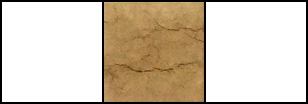

In [17]:
# @title Cell 1

import yaml
import os
from PIL import Image
from IPython.display import display

# Load the existing YAML file
existing_file_path = '/content/DDPM-model/config/default.yaml'
with open(existing_file_path, 'r') as file:
    config = yaml.safe_load(file)

# Extract the task_name from the config
task_name = config['train_params']['task_name']

# Construct the path incorporating the task_name
task_path = os.path.join('/content/DDPM-model/', task_name, 'samples')

# Print the path of the first sample image (x0_0.png)
sample_image_path = os.path.join(task_path, 'x0_0.png')
print("Path of x0_0.png:", sample_image_path)

# Open the image
sample_image = Image.open(sample_image_path)

# Display the image in the output cell
display(sample_image)


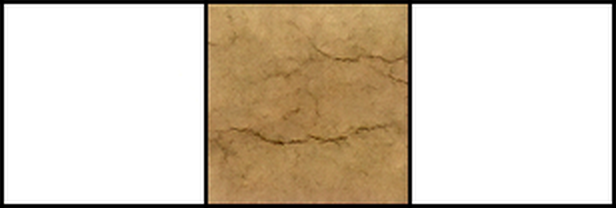

In [24]:
# @title Cell 2
Scaling_factor = 2 # @param {type:"slider", min:0, max:10, step:1}
from PIL import Image
import os
import yaml
from IPython.display import display

# Load the existing YAML file
existing_file_path = '/content/DDPM-model/config/default.yaml'
with open(existing_file_path, 'r') as file:
    config = yaml.safe_load(file)

# Extract the task_name from the config
task_name = config['train_params']['task_name']

# Construct the path to the samples folder
samples_path = os.path.join('/content/DDPM-model/', task_name, 'samples')

# Define the path to x0_0.png
x0_0_path = os.path.join(samples_path, 'x0_0.png')

# Open and upscale the x0_0.png image
image = Image.open(x0_0_path)
upscaled_image = image.resize((image.width * Scaling_factor, image.height * Scaling_factor), Image.LANCZOS)

# Display the upscaled image directly in the output cell
display(upscaled_image)

